# Описание:
На вкладке data приведены сессии просмотра телеканалов респондентами

Задание (анализ данных):
Загрузить датасет в pandas dataframe и при необходимости предобработать
После всестороннего анализа данных описать выявленные особенности телепотребления

Задание (обработка данных)
Необходимо построить почасовую динамику в течение дня. 
Обращаем внимание, что сессию  15:45-17:08 логичино учитывать в трех часовых интервалах - 15:00-16:00, 16:00-17:00, 17:00-18:00


In [2]:
import pandas as pd
import os
import numpy as np
import datetime


import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'F.Kulikov_Mediascope.ipynb',
 'out3.zip',
 'out2.zip',
 'partner_in_analysis_tableau.xlsx',
 'out.zip']

In [4]:
df = pd.read_excel('partner_in_analysis_tableau.xlsx', sheet_name=1)

In [5]:
df.head(20)

,ResearchDate,RespondentID,Start,Stop,Duration,PackageID,Weight,Title
0,2021-02-06,resp0478878,2021-02-06 20:20:00,2021-02-06 20:20:00,60,2004,6.590,Мужчины 45-54
1,2021-02-06,resp0478878,2021-02-06 15:45:00,2021-02-06 17:08:00,5040,2039,6.590,Мужчины 45-54
2,2021-02-06,resp0478878,2021-02-06 10:07:00,2021-02-06 11:57:00,6660,2075,6.590,Мужчины 45-54
3,2021-02-06,resp0478878,2021-02-06 21:05:00,2021-02-06 21:06:00,120,2075,6.590,Мужчины 45-54
4,2021-02-06,resp0478878,2021-02-06 18:09:00,2021-02-06 18:38:00,1800,2086,6.590,Мужчины 45-54
5,2021-02-06,resp0478878,2021-02-06 15:41:00,2021-02-06 15:43:00,180,2077,6.590,Мужчины 45-54
6,2021-02-06,resp0478878,2021-02-06 20:37:00,2021-02-06 20:38:00,120,2036,6.590,Мужчины 45-54
7,2021-02-06,resp0773240,2021-02-06 11:45:00,2021-02-06 12:05:00,1260,2101,6.712,Женщины 45-54
8,2021-02-06,resp0773240,2021-02-06 12:14:00,2021-02-06 12:16:00,180,2050,6.712,Женщины 45-54
9,2021-02-06,resp0773240,2021-02-06 12:27:00,2021-02-06 12:28:00,120,2074,6.712,Женщины 45-54


In [6]:
df.shape

(150297, 8)

In [7]:
df.dtypes

ResearchDate    datetime64[ns]
RespondentID            object
Start           datetime64[ns]
Stop            datetime64[ns]
Duration                 int64
PackageID                int64
Weight                 float64
Title                   object
dtype: object

In [8]:
df.isna().sum()

ResearchDate    0
RespondentID    0
Start           0
Stop            0
Duration        0
PackageID       0
Weight          0
Title           0
dtype: int64

In [9]:
df.ResearchDate.min()

Timestamp('2021-02-06 00:00:00')

In [10]:
df.ResearchDate.max()

Timestamp('2021-02-14 00:00:00')

In [11]:
df.Start.min()

Timestamp('2021-02-06 05:00:00')

In [12]:
df.Stop.max()

Timestamp('2021-02-15 04:53:00')

In [13]:
df.RespondentID.nunique()

1299

In [14]:
df.PackageID.nunique()

102

In [15]:
df.Title.nunique()

12

In [16]:
df.Title.unique()

array(['Мужчины 45-54', 'Женщины 45-54', 'Женщины 35-44', 'Мужчины 35-44',
       'Женщины 55-64', 'Мужчины 55-64', 'Мужчины 65+', 'Женщины 65+',
       'Мужчины 25-34', 'Женщины 25-34', 'Мужчины 18-24 ',
       'Женщины 18-24 '], dtype=object)

In [17]:
df.Duration.max()

50640

In [18]:
df.describe()

,Duration,PackageID,Weight
count,150297.000000,150297.000000,150297.000000
mean,959.730534,2074.266173,7.677263
std,1921.130797,20.207596,10.416491
min,60.000000,2000.000000,0.091000
25%,120.000000,2065.000000,2.147000
50%,300.000000,2077.000000,3.958000
75%,960.000000,2086.000000,7.121000
max,50640.000000,2107.000000,52.066000


In [19]:
df.Duration.max()

50640

In [20]:
df['Duration'] = df['Duration'] / 60
df['Gender'] = df.apply(lambda x: x['Title'].split(' ')[0].replace('ы', 'а'), axis=1)
df['Age_group'] = df.apply(lambda x: x['Title'].split(' ')[1], axis=1)

In [21]:
df.Duration.max()

844.0

In [22]:
pd.DataFrame(df, columns = ['RespondentID', 'Gender']).drop_duplicates().Gender.value_counts()

Женщина    683
Мужчина    616
Name: Gender, dtype: int64

# Промежуточные выводы

В датасэте вполне понятные колонки кроме 'Weight' (возможно, удельный вес данного респондента внутри этой группы(?)):
    
    ResearchDate - дата исследования
    RespondentID - номер респондента
    Start - начало сессии просмотра канала
    Stop - конец сессии просмотра канала
    Duration - длительность сессии в секундах, вычисляется как разница между концом и началом сессии + 60 секунд
    PackageID - идентификатор телеканала(?)
    Title - возрастная группа, в которую входит респондент
    
    
    
В датасэте 150297 значений и 8 колонок
    
По типам данных все порядке, проблем не наблюдается
    
NaN'ов в датафрэйме не наблюдается, проверка показала 0
    
Сбор данных (Длительность исследования) происходит с начала 6-го февраля до конца 13-го февраля, но при этом первое логирование данных произошло только в 5 утра 6-го числа, а последнее логирование закончилось 15-го февраля в 4:53 утра
    
Исследуем 1299 уникальных респондентов
    
Делим их на 12 групп по возрасту
    
Максимум одной сессии длится 844 минут(50640 секунд, если смотреть до обработки), что около ~14 часов на одном канале
    
В качестве предобработки данных перевел длительность в минуты для удобства чтения, т.к минимальная сессия - 1 минута

Помимо этого было подсчитано количество участвующих респондетов по полу:
    Женщин - 683, 
    Мужчин - 616

In [23]:
df.head(10)

,ResearchDate,RespondentID,Start,Stop,Duration,PackageID,Weight,Title,Gender,Age_group
0,2021-02-06,resp0478878,2021-02-06 20:20:00,2021-02-06 20:20:00,1.0,2004,6.590,Мужчины 45-54,Мужчина,45-54
1,2021-02-06,resp0478878,2021-02-06 15:45:00,2021-02-06 17:08:00,84.0,2039,6.590,Мужчины 45-54,Мужчина,45-54
2,2021-02-06,resp0478878,2021-02-06 10:07:00,2021-02-06 11:57:00,111.0,2075,6.590,Мужчины 45-54,Мужчина,45-54
3,2021-02-06,resp0478878,2021-02-06 21:05:00,2021-02-06 21:06:00,2.0,2075,6.590,Мужчины 45-54,Мужчина,45-54
4,2021-02-06,resp0478878,2021-02-06 18:09:00,2021-02-06 18:38:00,30.0,2086,6.590,Мужчины 45-54,Мужчина,45-54
5,2021-02-06,resp0478878,2021-02-06 15:41:00,2021-02-06 15:43:00,3.0,2077,6.590,Мужчины 45-54,Мужчина,45-54
6,2021-02-06,resp0478878,2021-02-06 20:37:00,2021-02-06 20:38:00,2.0,2036,6.590,Мужчины 45-54,Мужчина,45-54
7,2021-02-06,resp0773240,2021-02-06 11:45:00,2021-02-06 12:05:00,21.0,2101,6.712,Женщины 45-54,Женщина,45-54
8,2021-02-06,resp0773240,2021-02-06 12:14:00,2021-02-06 12:16:00,3.0,2050,6.712,Женщины 45-54,Женщина,45-54
9,2021-02-06,resp0773240,2021-02-06 12:27:00,2021-02-06 12:28:00,2.0,2074,6.712,Женщины 45-54,Женщина,45-54


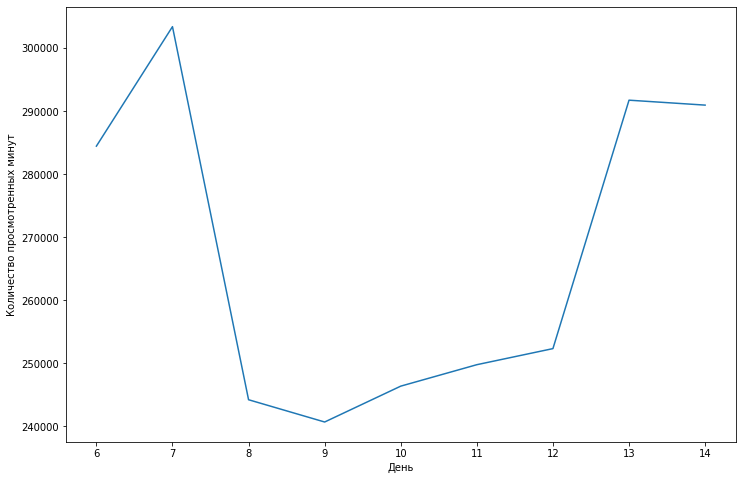

In [24]:
# График распределения количества просмотренных минут в зависимости от дня

plt.figure(figsize=(12, 8))

df.groupby([df['ResearchDate'].dt.day]).Duration.sum() \
    .plot(xlabel="День", ylabel="Количество просмотренных минут", kind="line")

plt.show()

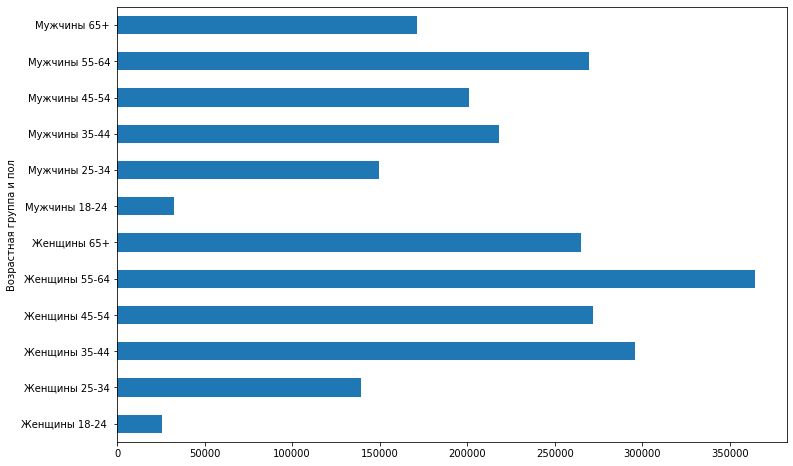

In [25]:
# График распределения количества просмотренных минут в сумме по возрастной группе

plt.figure(figsize=(12, 8))

df.groupby('Title').Duration.sum().plot(xlabel="Возрастная группа и пол", kind='barh')

plt.show()

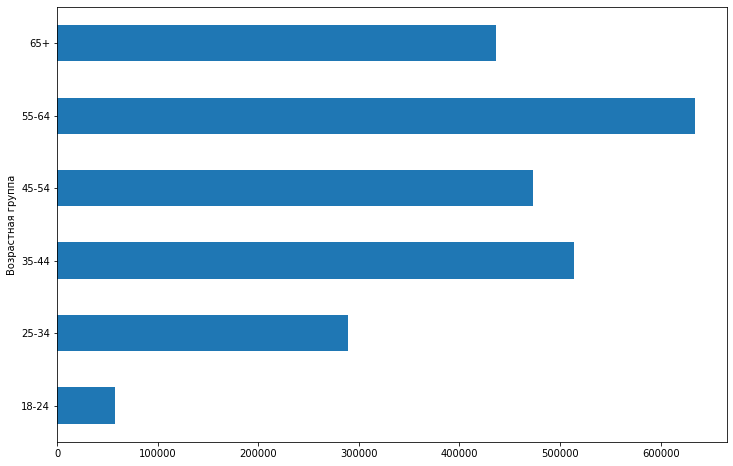

In [26]:
# График распределения количества просмотренных минут по возрастным группам

plt.figure(figsize=(12, 8))

df.groupby('Age_group').Duration.sum().plot(xlabel="Возрастная группа", kind='barh')

plt.show()

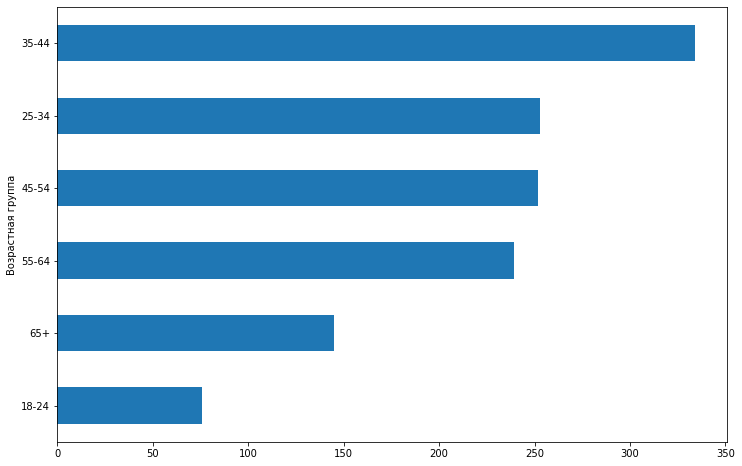

In [27]:
# Количество участников в разрезе по возрастной группе

plt.figure(figsize=(12, 8))

pd.DataFrame(df, columns = ['RespondentID', 'Age_group']).drop_duplicates().Age_group.value_counts().sort_values() \
    .plot(xlabel="Возрастная группа", kind='barh')

plt.show()

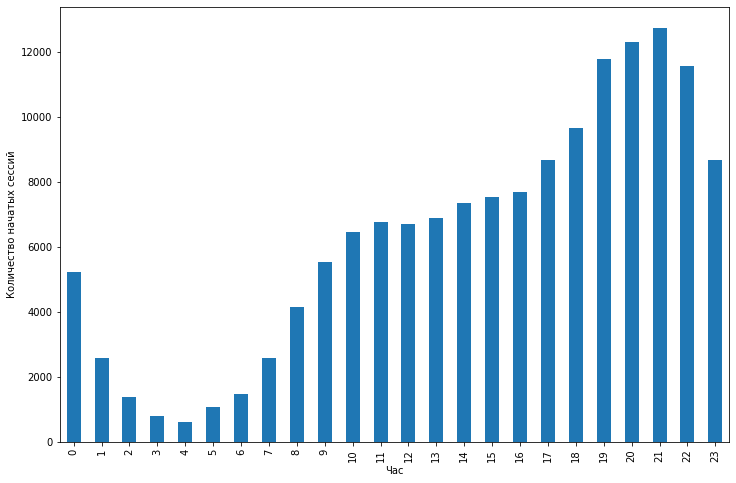

In [28]:
# График отображающий количество начатых сессий в течение дня

plt.figure(figsize=(12, 8))

df.groupby([df['Start'].dt.hour]).RespondentID.count().plot(xlabel="Час", ylabel="Количество начатых сессий", kind="bar")

plt.show()

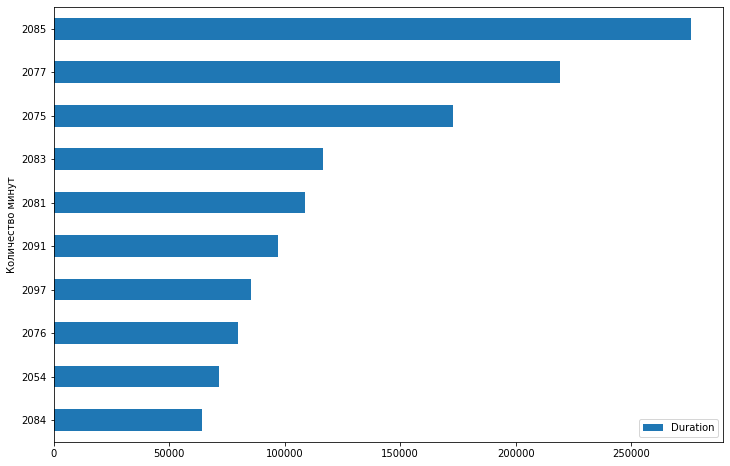

In [29]:
# Количество просмотренных минут для топ10 каналов

df.groupby(df['PackageID']).agg({"Duration": "sum"}) \
    .sort_values("Duration", ascending=True).tail(10) \
    .plot(xlabel="Количество минут", ylabel="Количество начатых сессий", kind="barh", figsize=(12, 8)) 

plt.show()

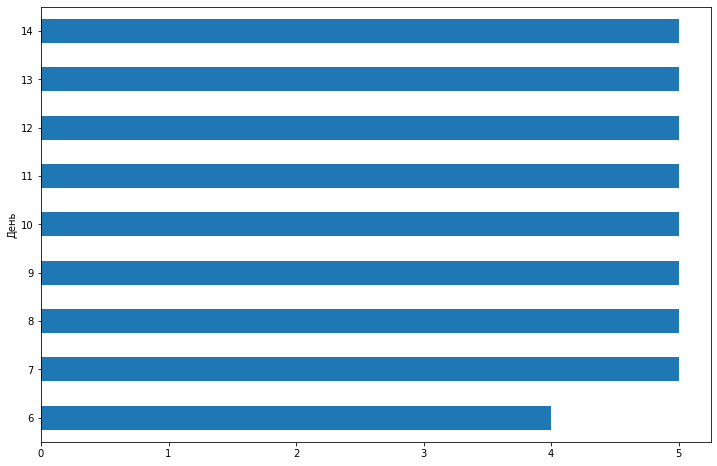

In [30]:
# Медиана просмотренных минут по дням на человека

plt.figure(figsize=(12, 8))

df.groupby([df['ResearchDate'].dt.day]).Duration.median() \
    .plot(xlabel="День", kind="barh")

plt.show()

In [31]:
# Сделаем дополнительный df для анализа в разбивке по возрасту

df2 = pd.concat([pd.DataFrame(df, columns = ['RespondentID', 'Age_group']).drop_duplicates().Age_group.value_counts(), 
                                 df.groupby('Age_group').Duration.sum()], axis=1)

df2.rename(columns={'Age_group': 'Number_of_people'}, inplace=True)
df2['Minutes_by_1_person'] = round(df2.Duration / df2.Number_of_people)

df2.head()

,Number_of_people,Duration,Minutes_by_1_person
35-44,334,513641.0,1538.0
25-34,253,289023.0,1142.0
45-54,252,473002.0,1877.0
55-64,239,634091.0,2653.0
65+,145,436403.0,3010.0


# Выводы о потреблении контента

1. 6-7 и 13-14 февраля наблюдаются явные пики с максимумом 7-го (минимум 9-ое число). Связано это с тем что эти дни - выходные, в выходные дни больше всего смотрят телевизор, т.к. больше свободного времени. Утверждать что во вторники смотрят меньше всего нельзя, т.к нельзя проследить динамику (больше одного вторника) и не возможно логически подкрепить данное предположение

2. В разбивке по возрастным группам и по полам можем наблюдать следующую картину:
    - В группе 18-24 смотрят меньше всего
    - В группе 55-64 для мужчин и женщин находится максимальное количество просмотренных минут
    - В общем сумме женщины больше смотрят телевизор
    - Мужчины 18-24 и 25-34 смотрят больше чем Женщины этих групп, но дальше динамика наоборот
    
3. Самыми популярными каналами по количеству просмотренных минут являются:
    - 2085
    - 2077
    - 2075
    - 2083
    - 2076
    - 2091
    - 2097
    - 2081
    - 2074
    - 2054

4. С помощью df2 мы можем утверждать, что:
    - Больше всего людей в группе 35-44 (334), а меньше всего в 65+ (145)
    - В сумме больше всего посмотрели минут люди из категории 55-64 (634к), а меньше всего 25-34 (289к)
    - Больше всего просмотренных минут на человека за весь период исследования приходится на людей из группы 65+ (3к), тогда как меньше всего на людей из группы 25-34 (1,1к)
    
Примечание: дополнить можно было бы
    
    1) Сделав разбивку для графиков для категорий по полу
    
    2) Сделать разбивки по среднему или даже лучше медиане(чтобы избавиться от сильных выбросов) вместо суммы минут (Хотя df.describe() сказал нам что медиана для Duration у нас будет 5 минут)
    
    upd. График действительно не очень информативный: у нас везде медиана потребления в 5 минут, кроме 6-го числа, где она равна 4-ем минутам. Если бы данные были более сложные (секунды не были бы 00), то возможно это была бы более интересная характеристика

In [32]:
# Приземляем к началу часа старт и стоп, чтобы при прогонке по частоте был учтен каждый час

df['Start_hour'] = df.Start.dt.floor('h')
df['Stop_hour'] = df.Stop.dt.floor('h')

In [33]:
# Пишем анонимную функцию, которая собирает все часы между интервалами для каждой строки

df['Interval'] = df.apply(lambda x: pd.date_range(x['Start_hour'], x['Stop_hour'], freq='H'), axis=1)

In [34]:
df.head()

,ResearchDate,RespondentID,Start,Stop,Duration,PackageID,Weight,Title,Gender,Age_group,Start_hour,Stop_hour,Interval
0,2021-02-06,resp0478878,2021-02-06 20:20:00,2021-02-06 20:20:00,1.0,2004,6.59,Мужчины 45-54,Мужчина,45-54,2021-02-06 20:00:00,2021-02-06 20:00:00,"DatetimeIndex(['2021-02-06 20:00:00'], dtype='..."
1,2021-02-06,resp0478878,2021-02-06 15:45:00,2021-02-06 17:08:00,84.0,2039,6.59,Мужчины 45-54,Мужчина,45-54,2021-02-06 15:00:00,2021-02-06 17:00:00,"DatetimeIndex(['2021-02-06 15:00:00', '2021-02..."
2,2021-02-06,resp0478878,2021-02-06 10:07:00,2021-02-06 11:57:00,111.0,2075,6.59,Мужчины 45-54,Мужчина,45-54,2021-02-06 10:00:00,2021-02-06 11:00:00,"DatetimeIndex(['2021-02-06 10:00:00', '2021-02..."
3,2021-02-06,resp0478878,2021-02-06 21:05:00,2021-02-06 21:06:00,2.0,2075,6.59,Мужчины 45-54,Мужчина,45-54,2021-02-06 21:00:00,2021-02-06 21:00:00,"DatetimeIndex(['2021-02-06 21:00:00'], dtype='..."
4,2021-02-06,resp0478878,2021-02-06 18:09:00,2021-02-06 18:38:00,30.0,2086,6.59,Мужчины 45-54,Мужчина,45-54,2021-02-06 18:00:00,2021-02-06 18:00:00,"DatetimeIndex(['2021-02-06 18:00:00'], dtype='..."


In [35]:
# Проверяем что для первой сессии 20:20-20:20 у нас содержится только одно значение

df.Interval.iloc[0]

DatetimeIndex(['2021-02-06 20:00:00'], dtype='datetime64[ns]', freq='H')

In [36]:
# Проверяем что для второй сессии 15:45-17:08 у нас содержится три значения

df.Interval.iloc[1]

DatetimeIndex(['2021-02-06 15:00:00', '2021-02-06 16:00:00',
               '2021-02-06 17:00:00'],
              dtype='datetime64[ns]', freq='H')

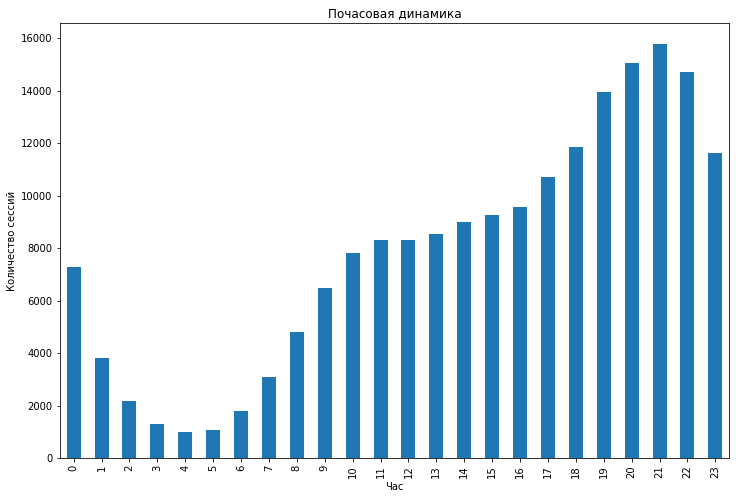

In [37]:
# Применяем функцию explode() для выгрузки дат в столбец, а потом с помощью dt.hour вытакскиваем час для каждой даты.
# Потом проводим подсчет через value_counts() и сортируем по индексу в порядке возрастания

plt.figure(figsize=(12, 8))

df.Interval.explode().dt.hour.value_counts().sort_index(ascending=True) \
    .plot(xlabel="Час", ylabel="Количество сессий", kind='bar').set_title('Почасовая динамика')

plt.show()

In [40]:
df3 = df.Interval.explode().dt.hour.value_counts().sort_index(ascending=True)

In [97]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [101]:
compression_opts = dict(method='zip',
                        archive_name='out2.csv')  
df2.to_csv('out2.zip', index=False,
          compression=compression_opts) 

In [102]:
compression_opts = dict(method='zip',
                        archive_name='out3.csv')  
df3.to_csv('out3.zip', index=False,
          compression=compression_opts) 